<a href="https://colab.research.google.com/github/euguroglu/Machine-Learning-Projects/blob/master/Pytorch_Mobile_phone_price_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import sys
from sklearn.datasets import load_boston
import torch
import torch.nn as nn
from sklearn.preprocessing import StandardScaler
import math
import torch.nn.functional as F
from sklearn.metrics import precision_score

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Data Preperation

In [3]:
df = pd.read_csv('train.csv')

In [4]:
df = df.sort_values(by=['price_range'])

In [5]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1838,720,1,0.9,1,12,1,14,0.8,165,4,14,366,1234,1086,14,7,3,1,1,0,0
1762,808,1,0.5,1,3,0,46,0.5,105,8,15,119,529,1082,15,5,10,1,0,1,0
419,914,1,0.9,0,2,0,4,0.8,100,2,12,191,1495,808,11,7,5,1,1,0,0
846,1489,0,2.4,1,8,0,32,0.6,200,1,16,172,812,776,7,6,8,0,0,0,0
845,1907,0,2.0,0,13,0,55,0.9,105,7,15,713,1513,286,14,4,17,1,0,1,0


In [6]:
df.shape

(2000, 21)

In [7]:
df['Res'] = df['px_height']*df['px_width']

In [8]:
X = df.drop(['px_height','px_width'],1)

In [9]:
y = df['price_range']

In [10]:
X.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,Res
1838,720,1,0.9,1,12,1,14,0.8,165,4,14,1086,14,7,3,1,1,0,0,451644
1762,808,1,0.5,1,3,0,46,0.5,105,8,15,1082,15,5,10,1,0,1,0,62951
419,914,1,0.9,0,2,0,4,0.8,100,2,12,808,11,7,5,1,1,0,0,285545
846,1489,0,2.4,1,8,0,32,0.6,200,1,16,776,7,6,8,0,0,0,0,139664
845,1907,0,2.0,0,13,0,55,0.9,105,7,15,286,14,4,17,1,0,1,0,1078769


In [11]:
y.value_counts()

3    500
2    500
1    500
0    500
Name: price_range, dtype: int64

## Correlation

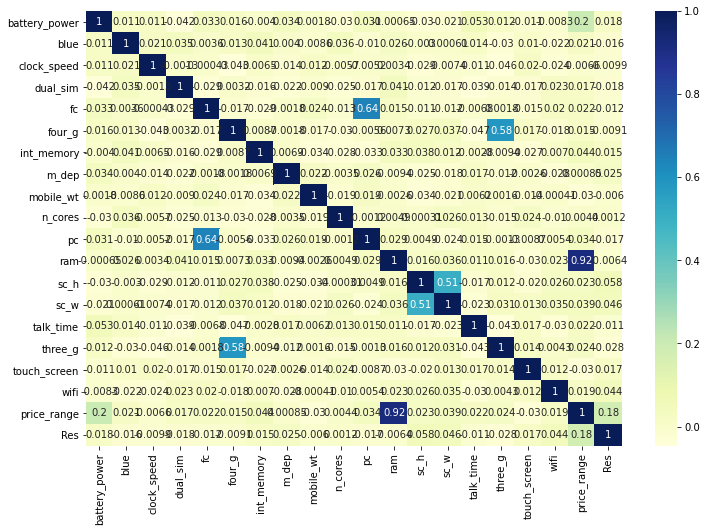

In [12]:
pd.options.display.float_format = '{:,.2f}'.format
corr_matrix = X.corr()
corr_matrix
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu')
plt.show()

Text(0.5, 1.0, 'Price Range Distrubtion')

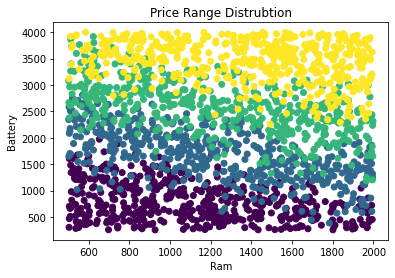

In [13]:

x = df[['battery_power','ram']]

Y = y.values
plt.scatter(x.values[:,0],x.values[:,1],c=Y)
plt.xlabel('Ram')
plt.ylabel('Battery')
plt.title('Price Range Distrubtion')

In [14]:
X = X[['ram','battery_power','Res']]

In [15]:
X = X.to_numpy()

In [16]:
y = y.to_numpy().reshape(-1,1)

Text(0.5, 1.0, 'Result Distribution')

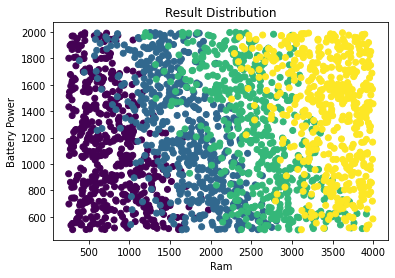

In [17]:
plt.scatter(X[:,0],X[:,1], c=y)
plt.xlabel('Ram')
plt.ylabel('Battery Power')
plt.title('Result Distribution')

In [18]:
class Model(nn.Module):

  def __init__(self,in_features=3,h1=8,h2=9,out_features=4):
    # how many layers?
    super().__init__()
    
    self.fc1 = nn.Linear(in_features,h1)
    self.fc2 = nn.BatchNorm1d(h1)
    self.fc3 = nn.Linear(h1,h2)
    self.fc4 = nn.BatchNorm1d(h2)
    self.out = nn.Linear(h2,out_features)

   
    
  def forward(self,x):
    
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = F.relu(self.fc3(x))
    x = F.relu(self.fc4(x))
    x = self.out(x)
    return x

In [19]:
model = Model()

In [20]:
model

Model(
  (fc1): Linear(in_features=3, out_features=8, bias=True)
  (fc2): BatchNorm1d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc3): Linear(in_features=8, out_features=9, bias=True)
  (fc4): BatchNorm1d(9, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (out): Linear(in_features=9, out_features=4, bias=True)
)

In [21]:
X_train = torch.FloatTensor(X)

In [22]:
y_train = torch.LongTensor(y).reshape(-1)

In [23]:
criterion = nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(model.parameters(),lr=0.001)

In [24]:
epochs = 2000
losses = []

for i in range(epochs):

  # forward and get a prediction
  y_pred = model.forward(X_train)
  # calculate loss/error
  loss = criterion(y_pred,y_train)
  losses.append(loss)
  if i%100==0:
    print('Epoch: {} and Loss: {}'.format(i,loss))
  #Backpropagation
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch: 0 and Loss: 1.4738916158676147
Epoch: 100 and Loss: 1.3839327096939087
Epoch: 200 and Loss: 1.3646419048309326
Epoch: 300 and Loss: 1.0759897232055664
Epoch: 400 and Loss: 0.7744468450546265
Epoch: 500 and Loss: 0.6422252058982849
Epoch: 600 and Loss: 0.5462793707847595
Epoch: 700 and Loss: 0.4385885000228882
Epoch: 800 and Loss: 0.365006685256958
Epoch: 900 and Loss: 0.3109360635280609
Epoch: 1000 and Loss: 0.2730707824230194
Epoch: 1100 and Loss: 0.24372772872447968
Epoch: 1200 and Loss: 0.22234627604484558
Epoch: 1300 and Loss: 0.20870687067508698
Epoch: 1400 and Loss: 0.20086261630058289
Epoch: 1500 and Loss: 0.18460194766521454
Epoch: 1600 and Loss: 0.17902225255966187
Epoch: 1700 and Loss: 0.171217679977417
Epoch: 1800 and Loss: 0.1655864715576172
Epoch: 1900 and Loss: 0.1634221076965332


Text(0.5, 0, 'Epoch')

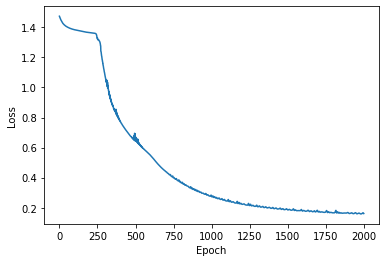

In [25]:
plt.plot(range(epochs),losses)
plt.ylabel('Loss')
plt.xlabel('Epoch')

In [26]:
df_2 = pd.read_csv('test.csv')

In [27]:
df_2['Res'] = df_2['px_height']*df_2['px_width']

In [28]:
X_val = df_2[['ram','battery_power','Res']]

In [29]:
X_val = X_val.to_numpy()

In [30]:
X_test = torch.FloatTensor(X_val)

## Evaluation on test data

In [37]:
# TO EVALUATE THE ENTIRE TEST SET
with torch.no_grad():
    y_pred_2 = model.forward(X_test)
    


In [38]:
from sklearn.svm import SVC
from mlxtend.plotting import plot_decision_regions

In [39]:
y_item = []
for i in range(1000):
  y_item.append(y_pred_2[i].argmax())

In [40]:
y_item = np.array(y_item)

In [42]:
X_test_plot = X_test[:,[0,1]]

## Test data Classification

In [43]:
svm = SVC(C=0.5, kernel='linear')
svm.fit(X_test_plot, y_item)

SVC(C=0.5, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


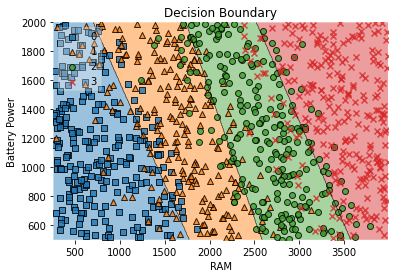

In [48]:
plot_decision_regions(X_test_plot.numpy(), y_item, clf=svm, legend=2)
plt.xlabel('RAM')
plt.ylabel('Battery Power')
plt.title('Decision Boundary')
plt.show()